Import the usefeull libraries

In [1]:

import sys
!{sys.executable} -m pip install numpy

import numpy as np
%matplotlib inline 
import matplotlib.pyplot as plt
from enum import Enum
import pandas as pd 
import seaborn as sns
import os.path
sns.set()
import missingno as mi



In [2]:
filepath = os.path.join('C:/','Users','nwenz','Desktop','projet') 

EdStatsCountry = 'EdStatsCountry.csv'
Country_path =os.path.join(filepath,EdStatsCountry)

EdStatsCountry_Series ="EdStatsCountry-Series.csv"
EdStatsCountry_Series_path = os.path.join(filepath, EdStatsCountry_Series)

EdStatsData ="EdStatsData.csv"
EdStatsData_Series_path = os.path.join(filepath, EdStatsData)

EdStatsFootNote ="EdStatsFootNote.csv"
EdStatsFootNote_path = os.path.join(filepath, EdStatsFootNote)

EdStatsSeries = "EdStatsSeries.csv"
EdStatsSeries_path = os.path.join(filepath, EdStatsSeries)


Country = pd.read_csv(Country_path)
EdStatsCountry_Series = pd.read_csv(EdStatsCountry_Series_path)
Data = pd.read_csv(EdStatsData_Series_path)
EdStatsFootNote = pd.read_csv(EdStatsFootNote_path)
EdStatsSeries = pd.read_csv(EdStatsSeries_path)



#Country = pd.read_csv('C:/Users/nwenz/Downloads/Projet+Python_Dataset_Edstats_csv/EdStatsCountry.csv')
#EdStatsCountry_Series = pd.read_csv('C:/Users/nwenz/Downloads/Projet+Python_Dataset_Edstats_csv/EdStatsCountry-Series.csv')
#Data = pd.read_csv('C:/Users/nwenz/Downloads/Projet+Python_Dataset_Edstats_csv/EdStatsData.csv')
#EdStatsFootNote = pd.read_csv('C:/Users/nwenz/Downloads/Projet+Python_Dataset_Edstats_csv/EdStatsFootNote.csv')
#EdStatsSeries = pd.read_csv('C:/Users/nwenz/Downloads/Projet+Python_Dataset_Edstats_csv/EdStatsSeries.csv')


Get info from the csv to describe teh dataset

In [3]:
Data.info()
EdStatsSeries.info()
EdStatsFootNote.info()
Country.info()
EdStatsCountry_Series.info()
#type(print(Country_path))
#mi.matrix(Data.sample(250))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 886930 entries, 0 to 886929
Data columns (total 70 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Country Name    886930 non-null  object 
 1   Country Code    886930 non-null  object 
 2   Indicator Name  886930 non-null  object 
 3   Indicator Code  886930 non-null  object 
 4   1970            72288 non-null   float64
 5   1971            35537 non-null   float64
 6   1972            35619 non-null   float64
 7   1973            35545 non-null   float64
 8   1974            35730 non-null   float64
 9   1975            87306 non-null   float64
 10  1976            37483 non-null   float64
 11  1977            37574 non-null   float64
 12  1978            37576 non-null   float64
 13  1979            36809 non-null   float64
 14  1980            89122 non-null   float64
 15  1981            38777 non-null   float64
 16  1982            37511 non-null   float64
 17  1983      

Merging the two principal dataset

In [4]:
Data=Data.merge(Country,on = 'Country Code')
Data2 = Data

In [5]:
#print(len(Data['Country Name']))
#print(len(Data['Country Name'].unique()))
#print(len(Data['Indicator Code'].unique()))
dup = len(Data['Country Name'])- len(Data['Indicator Code'].unique())*len(Data['Country Name'].unique())
print("il y a",dup,"rangées dupliquées")

il y a 0 rangées dupliquées


In [6]:
Data.info()
Data_dup=Data.drop_duplicates(subset=['Indicator Code', 'Country Name'])
Data_dup.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 883265 entries, 0 to 883264
Columns: 101 entries, Country Name to Unnamed: 31
dtypes: float64(70), object(31)
memory usage: 687.4+ MB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 883265 entries, 0 to 883264
Columns: 101 entries, Country Name to Unnamed: 31
dtypes: float64(70), object(31)
memory usage: 687.4+ MB


In [7]:
#Data.head()


Droping columns between 1970 and 2010

In [8]:
for i in range(1970,2010):
    anneeColonneInf = str(i)    
    Data.drop(anneeColonneInf, axis =1, inplace = True)
    #print(anneeColonne)
    
#Data.head()
#Data_modified = Data.drop(Data.iloc[:,4:24], axis =1)
Data['Income Group'].unique() # counting the number of unique income group 

array([nan, 'Low income', 'Upper middle income', 'High income: nonOECD',
       'Lower middle income', 'High income: OECD'], dtype=object)

In [9]:
#Data.info()
Data.drop(Data.loc[Data['Income Group']=='Low income'].index, inplace=True)
Data.dropna(subset =['Income Group'], inplace =True)
Data['Income Group'].unique() # verifying that nan and lower income is dropped

array(['Upper middle income', 'High income: nonOECD',
       'Lower middle income', 'High income: OECD'], dtype=object)

In [10]:
#Data_modified2 = Data_modified.drop(Data_modified.iloc[:,33:56], axis =1)

Dropping columns from 2016.

In [11]:
Data_region = Data['Region']

Data = Data.loc[:, :'2015']
    #Data1= pd.concat(Data[anneeColonne])
Data =pd.concat([Data,Data_region], axis = 1) # droping every columns after 2015 then adding Region back in 


In [12]:
#Data.drop(Data.iloc[:,35:57], axis =1, inplace = True)
Data.head()

,Country Name,Country Code,Indicator Name,Indicator Code,2010,2011,2012,2013,2014,2015,Region
95290,Albania,ALB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2,NaN,NaN,NaN,87.666588,88.778252,NaN,Europe & Central Asia
95291,Albania,ALB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.F,NaN,NaN,NaN,87.354607,88.133423,NaN,Europe & Central Asia
95292,Albania,ALB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.GPI,NaN,NaN,NaN,0.993110,0.986010,NaN,Europe & Central Asia
95293,Albania,ALB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.M,NaN,NaN,NaN,87.960289,89.383621,NaN,Europe & Central Asia
95294,Albania,ALB,"Adjusted net enrolment rate, primary, both sex...",SE.PRM.TENR,91.033867,93.225662,96.137093,95.912598,95.920891,NaN,Europe & Central Asia


choix des indicateurs

In [13]:
#Data.head()
Indic = 20 
#se_code = Data['Indicator Code'].str.contains('SE.').values
#used_ind_se =se_code.value_counts()[:Indic].index.tolist() # listing the 100 most used Indicator code
#print(se_code)
threshValue = 0.8*len(Data.columns)
Data.dropna(axis = 0,thresh = threshValue, inplace = True) 
Data_indic = Data['Indicator Code'].unique() #isolate all unique indicator
Data_indic = pd.Series(Data_indic) # convert into series
start_code = Data_indic.str[:3] # isolate every 3 first char of each string
unique_start_code = start_code.unique() # isolate unique combination of char 
#print(unique_start_code)
top_X = pd.DataFrame()  #set a dataframe to store data
top_final = pd.DataFrame() #set anorther dataframe to store data

for i in range(len(unique_start_code)):
    ind_codeX =Data['Indicator Code'].str.startswith(unique_start_code[i]) #store every indicator starting with one of the unique combination
    used_ind_codeX = Data[ind_codeX] # store the data related to the indicator
    used_ind_codeX = used_ind_codeX['Indicator Code'] # drop everything but indicator code columns

    top_X =pd.Series(used_ind_codeX.value_counts()[:Indic].index.tolist())# list 'indic' most used indicator code corresponding to the combination
    top_X_name = Data.loc[Data['Indicator Code'].isin(top_X)] # locating those indicators in Data
    top_X_name = pd.Series(top_X_name['Indicator Name'].unique())    # retrieving and storing their names
    
    top_final = pd.concat([top_final,top_X_name],axis = 1,ignore_index = True) #concatenating the series into a dataframe
top_final.head()
top_final_name = os.path.join(filepath,"top_final_updt.csv")
top_final.to_csv(path_or_buf = top_final_name ,sep =',')
# selecting all rows that match indicator code
#used_ind_nameX = Data.loc[Data['Indicator Code'].isin(top_X)]
#used_ind_nameX['Indicator Name'].unique() # printing each unique indicator name



#ind_codeSE =Data['Indicator Code'].str.startswith('SE.')
#used_ind_codeSE = Data[ind_codeSE]
#used_ind_codeSE = used_ind_codeSE['Indicator Code']
#top_SE = used_ind_codeSE.value_counts()[:Indic].index.tolist()# listing the 100 most used Indicator code

#print(top_SE)
#used_ind_codeSE = used_ind_codeSE.values().str.startswith('SE')
#used_ind_codeSE = pd.Series(used_ind_codeSE)

#used_ind_nameSE = Data.loc[Data['Indicator Code'].isin(top_SE)] # selecting all rows that match indicator code
#used_ind_nameSE['Indicator Name'].unique() # printing each unique indicator name


#used_ind_code =Data['Indicator Code'].value_counts()[:Indic].index.tolist() # listing the 100 most used Indicator code
#used_ind_name = Data.loc[Data['Indicator Code'].isin(used_ind_code)] # selecting all rows that match indicator code
#used_ind_name['Indicator Name'].unique() # printing each unique indicator name

In [14]:
print(unique_start_code)
#ind_codeY =Data['Indicator Code'].str.startswith('SP.') #store every indicator starting with one of the unique combination
#used_ind_codeY = Data[ind_codeY] # store the data related to the indicator
#used_ind_codeY2 = used_ind_codeY['Indicator Code'].unique()
#used_ind_codeY3 = used_ind_codeY['Indicator Name'].unique()
#indic_all= pd.concat(['used_ind_codeY2','used_ind_codeY3'],axis =1, ignore_index =True)
#print(used_ind_codeY2)
#print(used_ind_codeY3)

['SE.' 'UIS' 'NY.' 'IT.' 'SL.' 'SH.' 'SP.' 'XGD' 'OEC']


Selecting the indicators of interest by their indicator code

In [15]:
indicatorCode =['SE.COM.DURS','IT.NET.USER.P2','NY.GDP.MKTP.KD','SP.SEC.UTOT.IN','SL.UEM.TOTL.ZS']

Extracting the rows corresponding to the indicators selectioned

In [16]:
Data = Data.loc[Data['Indicator Code'].isin(indicatorCode)]

In [17]:
Data['Indicator Code'].unique()
#Data_modified4.info()
#Data.head()
#for i in range(2010,2016):
# anneeColonne = str(i)
  #  print(anneeColonne)
   # Data1= Data[anneeColonne]
    #Data1.info()

array(['SE.COM.DURS', 'NY.GDP.MKTP.KD', 'IT.NET.USER.P2',
       'SP.SEC.UTOT.IN', 'SL.UEM.TOTL.ZS'], dtype=object)

<AxesSubplot:>

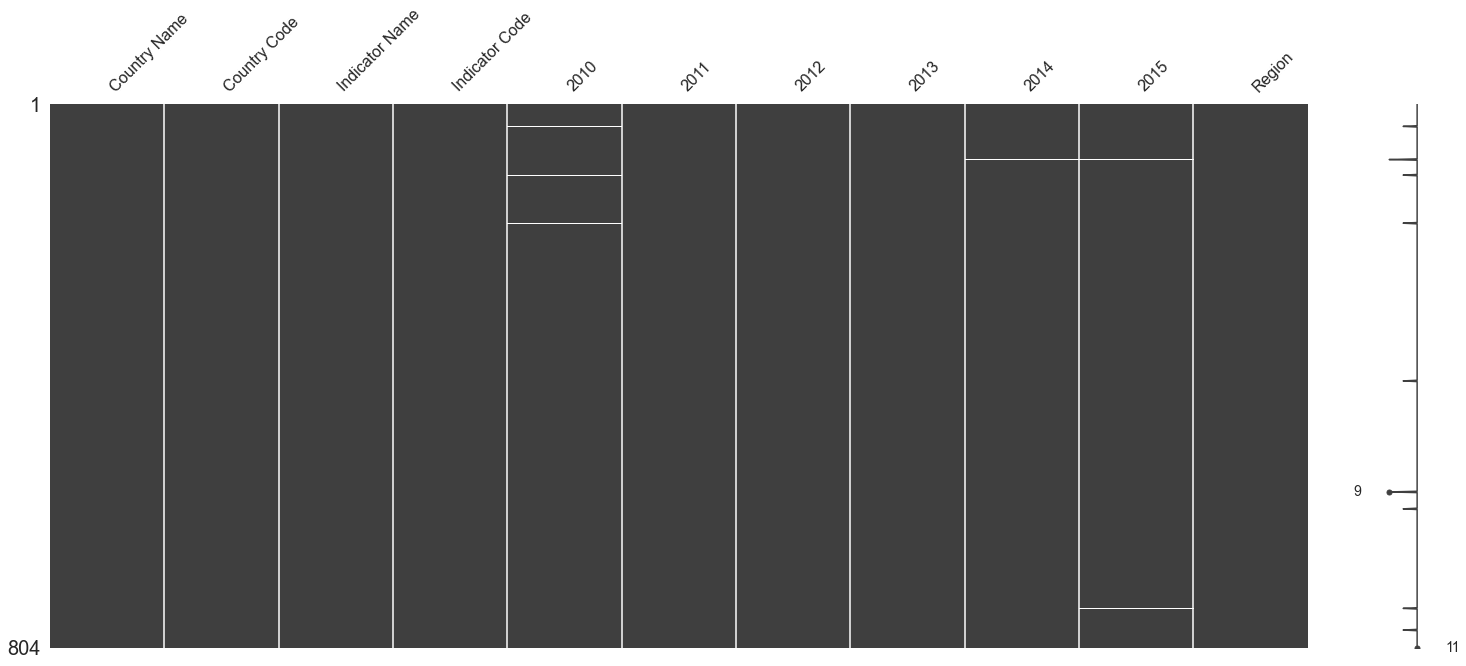

In [18]:
mi.matrix(Data)
#Data.sample(5)

Dropping lines with missing informations

In [19]:
#Data.drop(Data.iloc[:,4:23], axis =1, inplace = True)
#threshValue = 1*len(Data.columns)
#Data.dropna(axis = 0,thresh = threshValue, inplace = True) 

In [20]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 804 entries, 95992 to 879283
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Name    804 non-null    object 
 1   Country Code    804 non-null    object 
 2   Indicator Name  804 non-null    object 
 3   Indicator Code  804 non-null    object 
 4   2010            801 non-null    float64
 5   2011            804 non-null    float64
 6   2012            803 non-null    float64
 7   2013            804 non-null    float64
 8   2014            802 non-null    float64
 9   2015            799 non-null    float64
 10  Region          804 non-null    object 
dtypes: float64(6), object(5)
memory usage: 75.4+ KB


In [21]:
#mi.matrix(Data)
#Data.head()

Creating a Dataframe for each indicator

In [22]:
Data_pop = Data.loc[Data['Indicator Code'].isin(['SP.SEC.UTOT.IN'])]
Data_int = Data.loc[Data['Indicator Code'].isin(['IT.NET.USER.P2'])]
Data_dur = Data.loc[Data['Indicator Code'].isin(['SE.COM.DURS'])]
Data_gdp = Data.loc[Data['Indicator Code'].isin(['NY.GDP.MKTP.KD'])]
Data_unemp = Data.loc[Data['Indicator Code'].isin(['SL.UEM.TOTL.ZS'])]


Creating pivot table to see stats across indicatore code and Region in 2015

In [23]:
#Data_modified7.to_csv('C:/Users/nwenz/Downloads/Data_modified7.csv', index = False)
#Data_survival.info()
#Data_unemployement.info()
#Data_unemp.describe()
#Data_unemp2 = Data_unemp["Country Name"].unique()
Data.pivot_table('2015',index = 'Region', columns = 'Indicator Code')
Data_pop.head(10)


,Country Name,Country Code,Indicator Name,Indicator Code,2010,2011,2012,2013,2014,2015,Region
97622,Albania,ALB,Population of the official age for upper secon...,SP.SEC.UTOT.IN,178188.0,174347.0,170216.0,166043.0,161760.0,156541.0,Europe & Central Asia
101287,Algeria,DZA,Population of the official age for upper secon...,SP.SEC.UTOT.IN,2197269.0,2124617.0,2031993.0,1941965.0,1862417.0,1796069.0,Middle East & North Africa
112282,Angola,AGO,Population of the official age for upper secon...,SP.SEC.UTOT.IN,1388931.0,1438805.0,1493332.0,1551396.0,1612084.0,1674971.0,Sub-Saharan Africa
115947,Antigua and Barbuda,ATG,Population of the official age for upper secon...,SP.SEC.UTOT.IN,3162.0,3181.0,3184.0,3188.0,3185.0,3171.0,Latin America & Caribbean
119612,Argentina,ARG,Population of the official age for upper secon...,SP.SEC.UTOT.IN,2083754.0,2075353.0,2063512.0,2054555.0,2054332.0,2067256.0,Latin America & Caribbean
123277,Armenia,ARM,Population of the official age for upper secon...,SP.SEC.UTOT.IN,100015.0,94690.0,137411.0,127691.0,117286.0,107475.0,Europe & Central Asia
126942,Aruba,ABW,Population of the official age for upper secon...,SP.SEC.UTOT.IN,4623.0,4594.0,4553.0,4529.0,4510.0,4492.0,Latin America & Caribbean
130607,Australia,AUS,Population of the official age for upper secon...,SP.SEC.UTOT.IN,588029.0,594679.0,598033.0,597060.0,592273.0,586024.0,East Asia & Pacific
134272,Austria,AUT,Population of the official age for upper secon...,SP.SEC.UTOT.IN,398381.0,390628.0,383514.0,374778.0,366376.0,358901.0,Europe & Central Asia
137937,Azerbaijan,AZE,Population of the official age for upper secon...,SP.SEC.UTOT.IN,349666.0,333580.0,315152.0,291216.0,275965.0,272678.0,Europe & Central Asia


In [24]:
#Data2[["East Asia & Pacific"],["SL.UEM.TOTL.ZS"]].describe()
#ECA = Data2[ECA]
#ECA.describe()

Creating pivot table to see stats across indicatore code and country in 2015

In [25]:
Data_end = Data.pivot_table('2015',index = 'Country Name', columns = 'Indicator Code')

concatenate the values between 2010 and 2015 for each dataframe in a serie

[Text(0.5, 0, 'GDP in Dollars')]

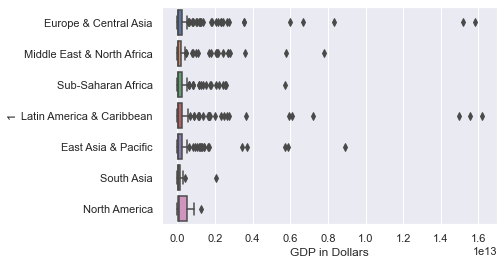

In [26]:
array_gdp = []
array_int = []
array_dur = []
array_unemp = []
array_pop = []
Data_region = pd.Series(dtype = str)
Data_country = pd.Series(dtype = str)

for i in range(2010,2016):
    anneeColonne = str(i)  
    array_gdp.append(Data_gdp[anneeColonne])
    array_int.append(Data_int[anneeColonne])
    array_dur.append(Data_dur[anneeColonne])
    array_unemp.append(Data_unemp[anneeColonne])
    array_pop.append(Data_pop[anneeColonne])
    
    Data_region = pd.concat([Data_region,Data_unemp['Region']],ignore_index = True)
    Data_country = pd.concat([Data_country,Data_unemp['Country Name']],ignore_index = True)
    
    
Data_gdp_corr = pd.concat(array_gdp,ignore_index =True)
Data_int_corr = pd.concat(array_int,ignore_index =True)
Data_dur_corr = pd.concat(array_dur,ignore_index =True)
Data_unemp_corr = pd.concat(array_unemp,ignore_index =True)
Data_pop_corr = pd.concat(array_pop,ignore_index =True)
#Data_internet_corr = pd.concat(Data_internet, keys = anneeColonne)
#Data_unemployement_corr = pd.concat(Data_unemployement, keys = anneeColonne)
#Data_literacy_corr = pd.concat(Data_literacy, keys = anneeColonne)

Data_gdp_stats = pd.concat ([Data_gdp_corr,Data_region], axis =1, ignore_index =True)
Data_int_stats = pd.concat ([Data_int_corr,Data_region], axis =1, ignore_index =True)
Data_dur_stats = pd.concat ([Data_dur_corr,Data_region], axis =1, ignore_index =True)
Data_unemp_stats = pd.concat ([Data_unemp_corr,Data_region], axis =1, ignore_index =True)
Data_pop_stats = pd.concat ([Data_pop_corr,Data_region], axis =1, ignore_index =True)

sns.boxplot( x =Data_gdp_stats[0], y = Data_gdp_stats[1]).set(xlabel ='GDP in Dollars')


[Text(0.5, 0, 'internet users (%)')]

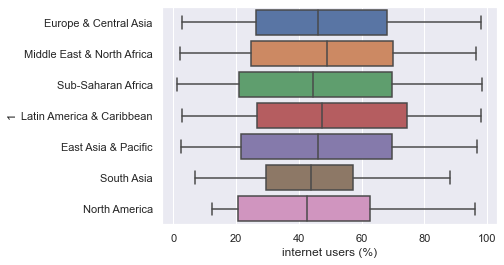

In [27]:
sns.boxplot( x =Data_int_stats[0], y = Data_unemp_stats[1]).set(xlabel ='internet users (%)')

[Text(0.5, 0, 'Unemployement rate (%)')]

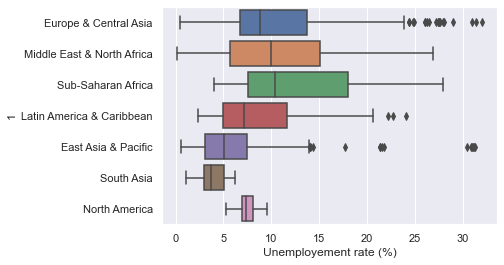

In [28]:
sns.boxplot( x =Data_unemp_stats[0], y = Data_int_stats[1]).set(xlabel ='Unemployement rate (%)')

[Text(0.5, 0, 'duration of compulsory school (years)')]

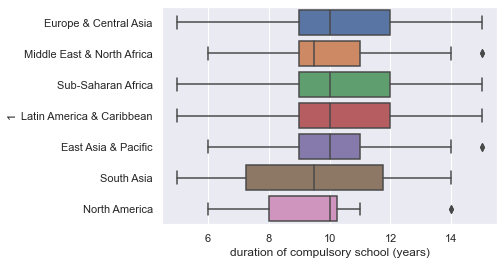

In [29]:
sns.boxplot( x =Data_dur_stats[0], y = Data_dur_stats[1]).set(xlabel ='duration of compulsory school (years)')

[Text(0.5, 0, 'population of age corresponding to upper secondary')]

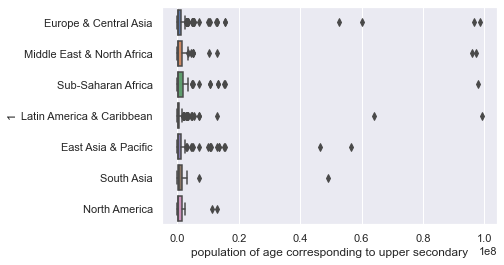

In [30]:
sns.boxplot( x =Data_pop_stats[0], y = Data_pop_stats[1]).set(xlabel ='population of age corresponding to upper secondary')

In [31]:
#Data_survival_corr2 = pd.concat([Data_survival['2010'],Data_survival['2011'],Data_survival['2012'],Data_survival['2013'],Data_survival['2014'],Data_survival['2015'],],axis=0)
#Data_internet_corr = pd.concat([Data_internet['2010'],Data_internet['2011'],Data_internet['2012'],Data_internet['2013'],Data_internet['2014'],Data_internet['2015'],],axis=0)
#Data_unemployement_corr = pd.concat([Data_unemployement['2010'],Data_unemployement['2011'],Data_unemployement['2012'],Data_unemployement['2013'],Data_unemployement['2014'],Data_unemployement['2015'],],axis=0)
#Data_literacy_corr = pd.concat([Data_literacy['2010'],Data_literacy['2011'],Data_literacy['2012'],Data_literacy['2013'],Data_literacy['2014'],Data_literacy['2015'],],axis=0)
#Data_pop_corr_stats = Data_pop_corr.groupby("Region")

In [32]:
print(len(Data_gdp_corr))
print(len(Data_int_corr))
print(len(Data_dur_corr))
print(len(Data_unemp_corr))
print(len(Data_pop_corr))


990
1008
954
912
960


Dropping columns with missing values

In [33]:
Data_gdp_corr.dropna(inplace = True)
Data_int_corr.dropna(inplace = True)
Data_dur_corr.dropna(inplace = True)
Data_unemp_corr.dropna(inplace = True)
Data_pop_corr.dropna(inplace = True)


In [34]:
print(len(Data_gdp_corr))
print(len(Data_int_corr))
print(len(Data_dur_corr))
print(len(Data_unemp_corr))
print(len(Data_pop_corr))

985
1007
953
912
956


In [35]:
#ata_exp_corr.sample(100)

Calculating the correlation coefficient between the series

In [36]:
data_features = pd.concat([Data_gdp_corr,Data_int_corr,Data_dur_corr,Data_unemp_corr,Data_pop_corr],axis = 1,ignore_index = True)
data_features.rename(columns = {0:"GDP",1:"Internet users",2:"school duration",3:"unemployement",4:"educated pop"},inplace = True)
#data_features.sample(15)

In [37]:

data_features.corr(method = 'pearson')

,GDP,Internet users,school duration,unemployement,educated pop
GDP,1.000000,-0.050215,0.030076,0.036775,-0.015408
Internet users,-0.050215,1.000000,-0.018838,-0.018177,-0.037276
school duration,0.030076,-0.018838,1.000000,-0.025196,-0.022504
unemployement,0.036775,-0.018177,-0.025196,1.000000,0.006995
educated pop,-0.015408,-0.037276,-0.022504,0.006995,1.000000


<AxesSubplot:>

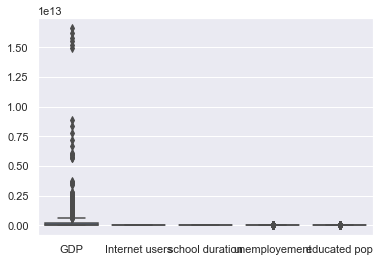

In [38]:
#data_indic = pd.DataFrame(Data_unemployement_corr)
#print(data_indic.index.unique())
#data_indic =[]
#print(type(data_indic))
#print(data_indic)
#data_indic=pd.concat([Data_internet_corr,Data_unemployement_corr],ignore_index = True, axis=1)
#data_indic.info()
#print(data_indic)
#frame_indic = pd.concat(data_indic, ignore_index =True, axis=1, sort = False)
#sns.boxplot(frame_indic)
#frame_indic = pd.concat([Data_internet_corr,Data_unemployement_corr], ignore_index = True,sort = False, axis=1)
sns.boxplot(data =data_features)

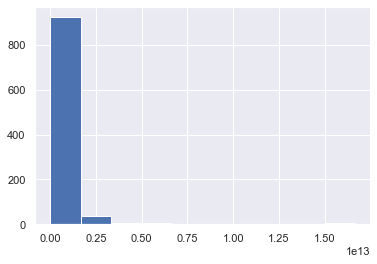

In [39]:
hist_gdp=  Data_gdp_corr.hist()
hist_int= Data_int_corr.hist()
hist_dur= Data_dur_corr.hist()
hist_unemp= Data_unemp_corr.hist()
hist_pop= Data_pop_corr.hist()


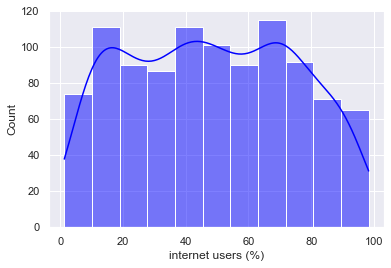

In [40]:
sns.histplot(Data_int_corr, kde=True, color = 'blue').set(xlabel = 'internet users (%)');
#sns.histplot(Data_dur_corr, kde=True, color ='red')
#sns.histplot(Data_unemployement_corr, kde=True, color = 'indigo')
#sns.histplot(Data_literacy_corr, kde=True,color = 'orange')


[Text(0.5, 0, 'years of compulsary schooling')]

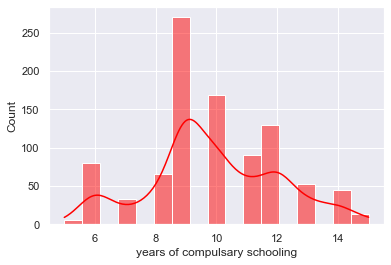

In [41]:
sns.histplot(Data_dur_corr, kde=True, color ='red').set(xlabel = 'years of compulsary schooling')

[Text(0.5, 0, 'unemployement rate (%)')]

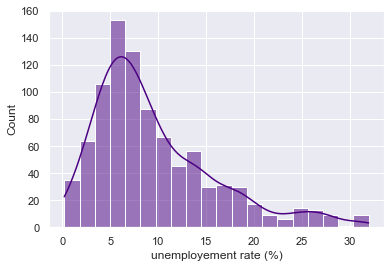

In [42]:
sns.histplot(Data_unemp_corr, kde=True, color = 'indigo').set(xlabel = 'unemployement rate (%)')

[Text(0.5, 0, 'number of person of age corresponding to late secondary schooling')]

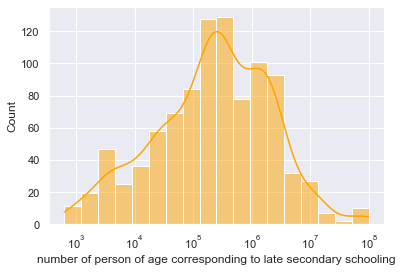

In [43]:
sns.histplot(Data_pop_corr, kde=True,color = 'orange',log_scale =True).set(xlabel = 'number of person of age corresponding to late secondary schooling')

[Text(0.5, 0, 'GDP ($)')]

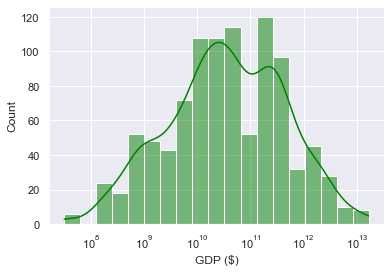

In [44]:
sns.histplot(Data_gdp_corr, kde=True,color = 'green', log_scale = True).set(xlabel = 'GDP ($)')

In [45]:
#Data_hist = pd.concat([Data_internet_corr,Data_unemployement_corr],ignore_index = True, axis =1)

In [46]:
#Data.sample(5)

In [47]:
Data_end_mask = (Data_end['SP.SEC.UTOT.IN'].values >10*6) &(Data_end['IT.NET.USER.P2'].values > 70) & (Data_end['SE.COM.DURS'] >10)&(Data_end['NY.GDP.MKTP.KD'] >10^10)&(Data_end['SL.UEM.TOTL.ZS'] <15)

In [48]:
Data_end_country = Data_end[Data_end_mask]
Data_end_country.rename(columns ={'IT.NET.USER.P2':"Internet Users", "NY.GDP.MKTP.KD":"GDP","SE.COM.DURS":"School Duration","SL.UEM.TOTL.ZS":"Unemployement rate","SP.SEC.UTOT.IN":"Educated Pop"})

Indicator Code,Internet Users,GDP,School Duration,Unemployement rate,Educated Pop
Country Name,,,,,
"Bahamas, The",78.000000,7.808223e+09,12.0,12.0,17580.0
Barbados,76.110000,4.536444e+09,11.0,11.4,7472.0
Belgium,85.052900,5.081083e+11,12.0,8.5,489215.0
France,84.694500,2.777538e+12,11.0,10.4,2283374.0
Germany,87.589800,3.709598e+12,12.0,4.6,2450787.0
Israel,77.352090,2.764873e+11,13.0,5.3,375172.0
Latvia,79.200600,2.826686e+10,11.0,9.9,50678.0
Luxembourg,97.334100,6.131708e+10,12.0,6.7,26920.0
Malta,76.184000,1.101774e+10,11.0,5.4,18741.0


In [49]:
Data_mask = Data2["Country Name"].isin(["Bahamas, The"," Barbados", "Belgium","France","Germany","Israel","Lativa","Luxembourg","Malta","Netherlands", "Russian Federation", "Switzerland","United Kingdom","United Stattes"])

In [53]:
Data2_country = Data2[Data_mask]
Data2_proj = Data2_country.loc[:,'2020':'2050']
Data2_proj = pd.concat([Data2_proj,Data2_country["Country Name"],Data2_country["Indicator Name"]],axis = 1)
#print(len(Data2_proj))
#Data2_proj.dropna(axis =0, thresh =3, inplace = True)
#print(Data2_proj["Indicator Name"].unique())
Data2_proj_mask = Data2_proj["Indicator Name"] == 'Wittgenstein Projection: Mean years of schooling. Age 15+. Total'
Data2_proj= Data2_proj[Data2_proj_mask]
Data2_proj


,2020,2025,2030,2035,2040,2045,2050,Country Name,Indicator Name
142625,9.8,10.0,10.1,10.3,10.4,10.5,10.7,"Bahamas, The",Wittgenstein Projection: Mean years of schooli...
160950,12.2,12.5,12.8,13.0,13.3,13.5,13.7,Belgium,Wittgenstein Projection: Mean years of schooli...
336870,11.3,11.7,12.0,12.3,12.6,12.9,13.1,France,Wittgenstein Projection: Mean years of schooli...
355195,13.7,13.8,13.9,14.0,14.1,14.3,14.4,Germany,Wittgenstein Projection: Mean years of schooli...
435825,11.9,12.0,12.1,12.2,12.3,12.4,12.5,Israel,Wittgenstein Projection: Mean years of schooli...
512790,11.7,12.1,12.3,12.6,12.8,13.0,13.3,Luxembourg,Wittgenstein Projection: Mean years of schooli...
542110,11.0,11.3,11.7,12.1,12.5,12.9,13.2,Malta,Wittgenstein Projection: Mean years of schooli...
600750,11.8,12.0,12.2,12.4,12.5,12.7,12.9,Netherlands,Wittgenstein Projection: Mean years of schooli...
677715,10.9,11.0,11.2,11.3,11.4,11.6,11.7,Russian Federation,Wittgenstein Projection: Mean years of schooli...
780335,12.7,12.9,13.0,13.2,13.3,13.5,13.6,Switzerland,Wittgenstein Projection: Mean years of schooli...


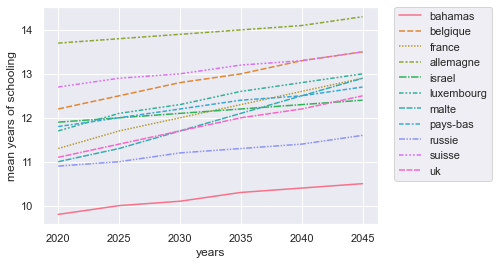

In [123]:
#Data_graph = Data2_proj.loc[Data2_proj['2020':'2050']]


bah = Data2_proj.loc[Data2_proj["Country Name"]=='Bahamas, The']
bah = bah.loc[:,'2020':'2050']
bah = pd.Series(bah.iloc[0,0:6])

bel = Data2_proj.loc[Data2_proj["Country Name"]=='Belgium']
bel = bel.loc[:,'2020':'2050']
bel = pd.Series(bel.iloc[0,0:6])

fra = Data2_proj.loc[Data2_proj["Country Name"]=='France']
fra = fra.loc[:,'2020':'2050']
fra = pd.Series(fra.iloc[0,0:6])

ger = Data2_proj.loc[Data2_proj["Country Name"]=='Germany']
ger = ger.loc[:,'2020':'2050']
ger = pd.Series(ger.iloc[0,0:6])

isr = Data2_proj.loc[Data2_proj["Country Name"]=='Israel']
isr = isr.loc[:,'2020':'2050']
isr = pd.Series(isr.iloc[0,0:6])

lux = Data2_proj.loc[Data2_proj["Country Name"]=='Luxembourg']
lux = lux.loc[:,'2020':'2050']
lux = pd.Series(lux.iloc[0,0:6])

mal = Data2_proj.loc[Data2_proj["Country Name"]=='Malta']
mal= mal.loc[:,'2020':'2050']
mal = pd.Series(mal.iloc[0,0:6])

net = Data2_proj.loc[Data2_proj["Country Name"]=='Netherlands']
net = net.loc[:,'2020':'2050']
net = pd.Series(net.iloc[0,0:6])

rus = Data2_proj.loc[Data2_proj["Country Name"]=='Russian Federation']
rus = rus.loc[:,'2020':'2050']
rus = pd.Series(rus.iloc[0,0:6])

swi = Data2_proj.loc[Data2_proj["Country Name"]=='Switzerland']
swi = swi.loc[:,'2020':'2050']
swi = pd.Series(swi.iloc[0,0:6])

uk =  Data2_proj.loc[Data2_proj["Country Name"]=='United Kingdom']
uk = uk.loc[:,'2020':'2050']
uk = pd.Series(uk.iloc[0,0:6])
dp= pd.concat([bah,bel,fra,ger,isr,lux,mal,net,rus,swi,uk],axis =1)
dp.rename(columns={142625:'bahamas',160950:'belgique',336870:'france',355195:'allemagne',435825:'israel',512790:'luxembourg',542110:'malte',600750:'pays-bas',677715:'russie',780335:'suisse',842640:'uk'},inplace = True)
dp.columns
#year = pd.Series([2020, 2025, 2030 ,2035, 2040, 2045 ,2050])
sns.lineplot(data=dp ).set(xlabel= 'years', ylabel="mean years of schooling")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 0 entries
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   2020            0 non-null      float64
 1   2025            0 non-null      float64
 2   2030            0 non-null      float64
 3   2035            0 non-null      float64
 4   2040            0 non-null      float64
 5   2045            0 non-null      float64
 6   2050            0 non-null      float64
 7   Country Name    0 non-null      object 
 8   Indicator Name  0 non-null      object 
dtypes: float64(7), object(2)
memory usage: 0.0+ bytes
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1 entries, 677715 to 677715
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   2020            1 non-null      float64
 1   2025            1 non-null      float64
 2   2030            1 non-null      float64
 3   2035            1 